In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Data/bearings.csv', index_col=0, parse_dates=[0])
df.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


<Axes: >

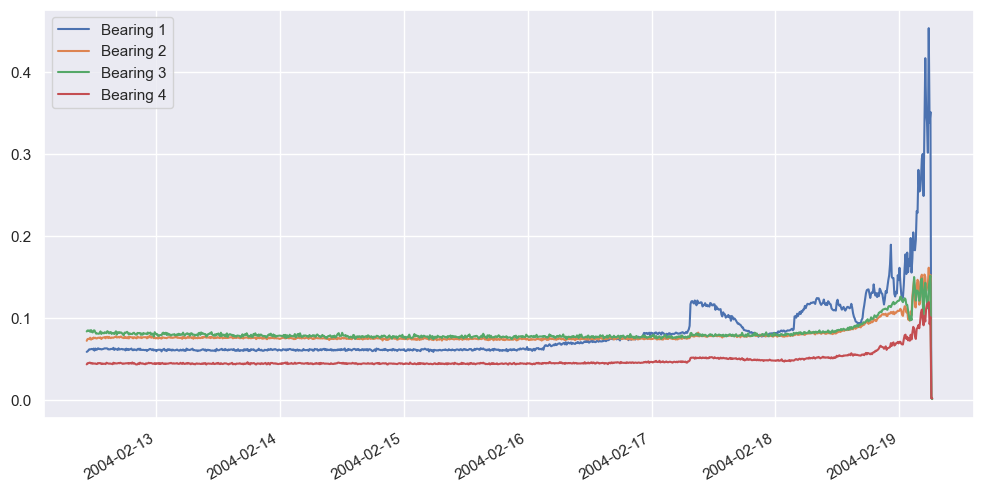

In [4]:
df.plot(figsize=(12,6))

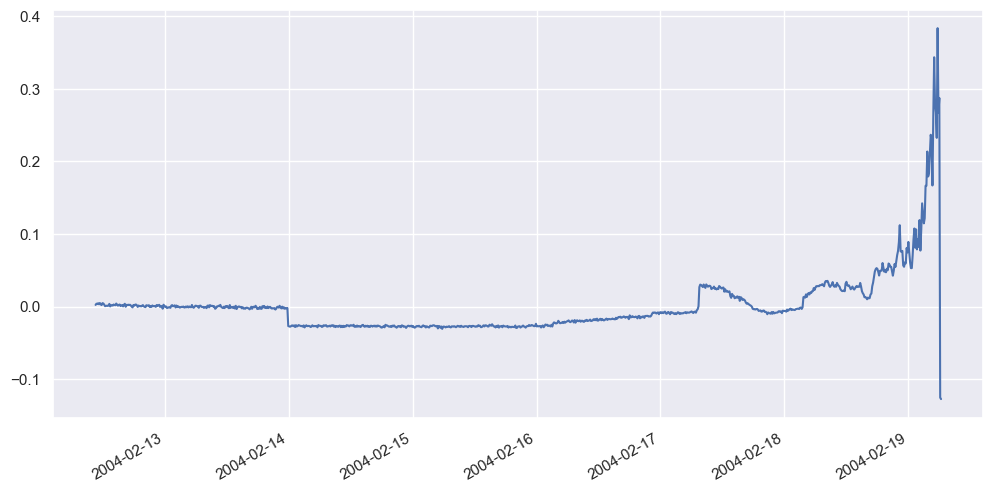

In [6]:
x_train = df['2004-02-12 10:32:39':'2004-02-13 23:42:39']
x_test = df['2004-02-13 23:52:39':]

pca = PCA(n_components=1, random_state=0)
x_train_pca = pd.DataFrame(pca.fit_transform(x_train))
x_train_pca.index = x_train.index 

x_test_pca = pd.DataFrame(pca.fit_transform(x_test))
x_test_pca.index = x_test.index

df_pca = pd.concat([x_train_pca, x_test_pca])
df_pca.plot(figsize=(12,6))
plt.legend().remove()

<Axes: >

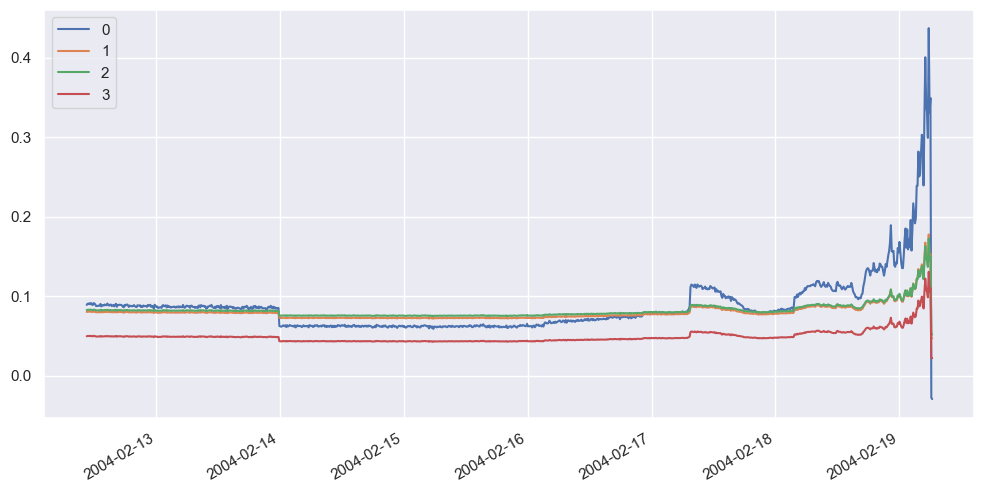

In [7]:
#Now invert the PCA transform and plot the “restored” dataset:
df_restored = pd.DataFrame(pca.inverse_transform(df_pca), index = df_pca.index)
df_restored.plot(figsize=(12,6))

<Axes: >

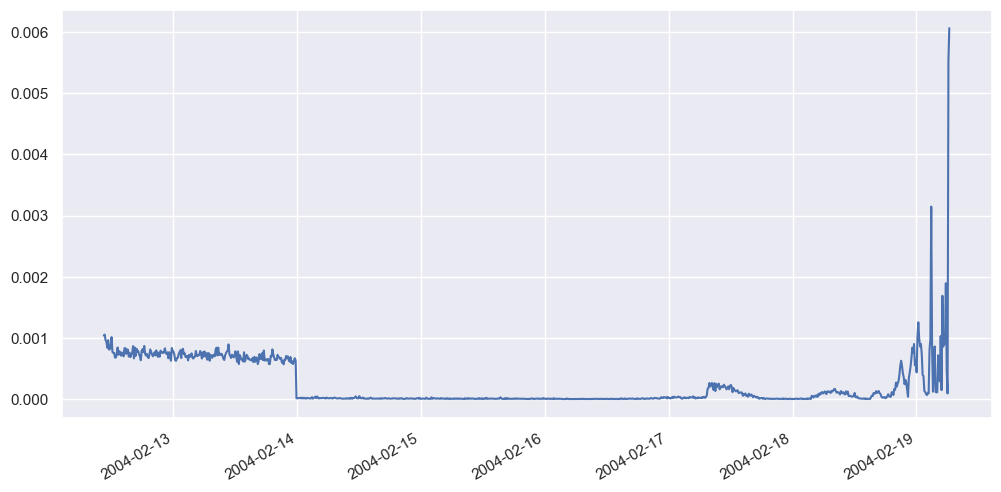

In [9]:
def get_anomaly_scores(df_original, df_restored):
    loss = np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1)
    loss = pd.Series(data=loss, index = df_original.index)
    return loss

scores = get_anomaly_scores(df, df_restored)
scores.plot(figsize=(12,6))

In [12]:
def is_anomaly(row, pca, threshold):
    pca_row = pca.transform(row)
    restored_row = pca.inverse_transform(pca_row)
    losses = np.sum((row - restored_row) ** 2)

    for loss in losses:
        if loss > threshold:
            return True;

    return False

In [13]:
x = df.loc[['2004-02-16 22:52:39']]
is_anomaly(x, pca, 0.002)

c:\Users\gbund\PyProject\bpl\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


False

In [18]:
x = df.loc[['2004-02-18 23:52:39']]
is_anomaly(x, pca, 0.0002)

c:\Users\gbund\PyProject\bpl\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


True

c:\Users\gbund\PyProject\bpl\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\gbund\PyProject\bpl\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\gbund\PyProject\bpl\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out

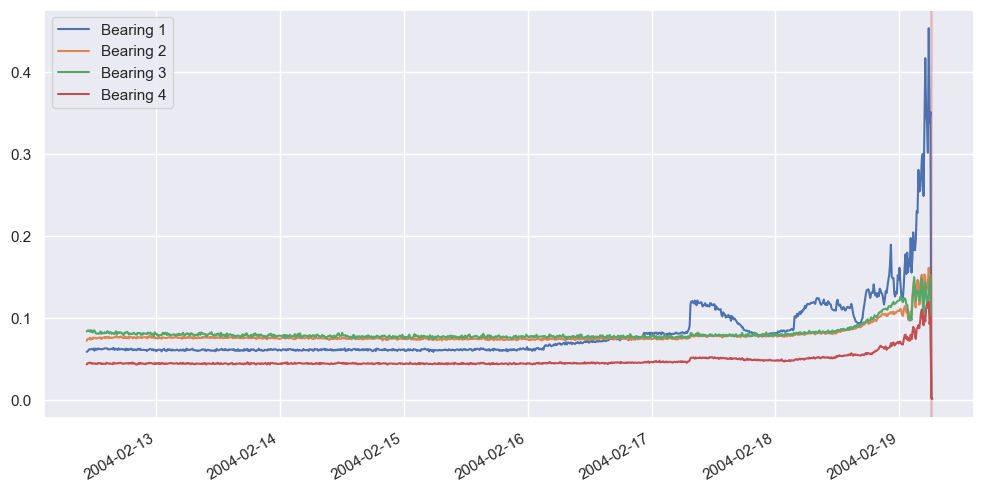

In [19]:
df.plot(figsize=(12,6))

for index, row in df.iterrows():
    if is_anomaly(pd.DataFrame([row]), pca, 0.002):
        plt.axvline(row.name, color ='r', alpha=0.2)

c:\Users\gbund\PyProject\bpl\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\gbund\PyProject\bpl\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\gbund\PyProject\bpl\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out

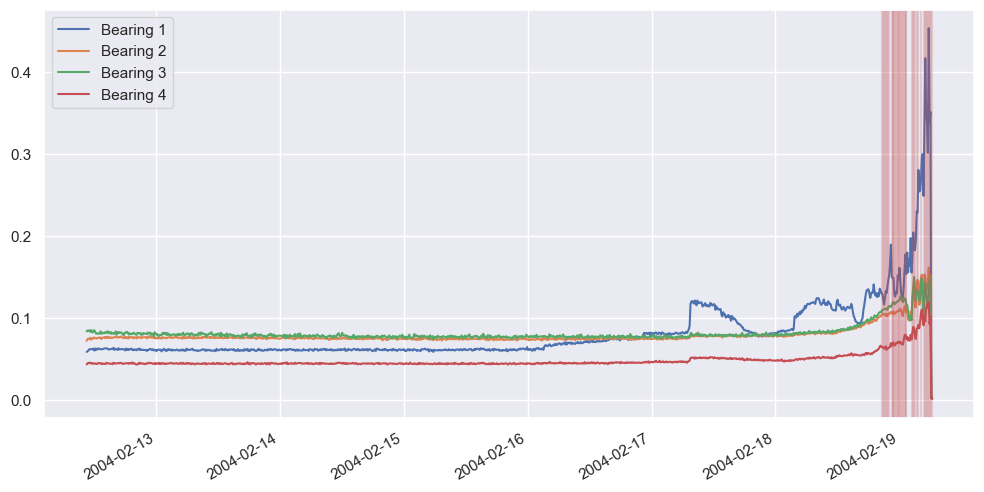

In [20]:
df.plot(figsize = (12, 6))
for index, row in df.iterrows():
    if is_anomaly(pd.DataFrame([row]), pca, 0.0002):
        plt.axvline(row.name, color='r', alpha=0.2)